In [38]:
import networkx as nx
import igraph
import pandas as pd
import pylab as plt
import numpy as np
import Bio
import seaborn as sns

In [2]:
print(Bio.__version__)

1.79


In [352]:
plt.rcParams["figure.figsize"] = 14, 10
sns.set_style("whitegrid")

# age gene classes из Liebeskind

Скачать [age gene classes](https://github.com/marcottelab/Gene-Ages) из Liebeskind et. al. 2016, и замапить их на наши сети.

In [176]:
yeast_data = pd.read_csv('../data/yeast.txt', sep='\t')
print(yeast_data.shape)

yeast_graph = nx.from_pandas_edgelist(yeast_data, source='Tf', target='Tg', create_using=nx.DiGraph())

print('# of edges: {}'.format(yeast_graph.number_of_edges()))
print('# of nodes: {}'.format(yeast_graph.number_of_nodes()))

(12873, 2)
# of edges: 12873
# of nodes: 4441


In [134]:
mouse_data = pd.read_csv('../data/trrust_rawdata.mouse.tsv', 
                         sep='\t', header=None, 
                         names=['TF', 'Target', 'Mode', 'PMID'])
print(mouse_data.shape)

mouse_graph = nx.from_pandas_edgelist(mouse_data, 'TF', 'Target', ['Mode', 'PMID'], create_using=nx.DiGraph())
print('# of edges: {}'.format(mouse_graph.number_of_edges()))
print('# of nodes: {}'.format(mouse_graph.number_of_nodes()))

(7057, 4)
# of edges: 6490
# of nodes: 2456


In [135]:
human_data = pd.read_csv('../data/trrust_rawdata.human.tsv', 
                         sep='\t', header=None, 
                         names=['TF', 'Target', 'Mode', 'PMID'])
print(human_data.shape)

human_graph = nx.from_pandas_edgelist(human_data, 'TF', 'Target', ['Mode', 'PMID'], create_using=nx.DiGraph())

print('# of edges: {}'.format(human_graph.number_of_edges()))
print('# of nodes: {}'.format(human_graph.number_of_nodes()))

(9396, 4)
# of edges: 8427
# of nodes: 2862


# Для начала можно просто посчитать количество пар TF-TG для каждого класса, нормированное на общее количество линков.



## Import classes from [Gene-Ages/Main/](https://github.com/marcottelab/Gene-Ages/tree/master/Main)

### Yeast

In [177]:
yeast_classes = pd.read_csv('../data/main_YEAST.csv')
print(yeast_classes.shape)
yeast_classes = yeast_classes.rename(columns={"Unnamed: 0": "Protein"})
yeast_classes.head()

(5000, 16)


,Protein,Cellular_organisms,Euk_Archaea,Euk+Bac,Eukaryota,Opisthokonta,Dikarya,Ascomycota,Saccharomyceta,modeAge,NumDBsContributing,NumDBsFiltered,entropy,NodeError,Bimodality,HGT_flag
0,A2P2R3,0.800,0.0,0.2,0.000000,0.0,0.000000,0.0,0.000000,Cellular_organisms,5,1,0.500402,0.0,0.000000,False
1,D6VTK4,0.000,0.0,0.0,0.000000,0.0,0.000000,0.9,0.100000,Ascomycota,10,0,0.325083,0.2,0.107143,False
2,D6W196,0.000,0.0,0.0,0.500000,0.0,0.300000,0.0,0.200000,Eukaryota,10,2,1.029653,2.86363636364,2.236866,False
3,O13297,0.000,0.0,0.0,0.272727,0.0,0.454545,0.0,0.272727,Dikarya,11,0,1.067090,2.94545454545,0.120000,False
4,O13516,0.375,0.5,0.0,0.125000,0.0,0.000000,0.0,0.000000,Euk_Archaea,8,1,0.974315,0.777777777778,-0.220779,False


In [178]:
# for uniprot mapping - https://www.uniprot.org/uploadlists/

yeast_ID_UniProt = list(yeast_classes['Protein'])

with open('../data/age_classes/yeast_ID_UniProt.txt', 'w') as f:
    for el in yeast_ID_UniProt:
        f.write(el+' ')

 ... https://www.uniprot.org/uploadlists/ ...

In [179]:
yeast_prot_genes = pd.read_csv('../data/age_classes/Yeast_UniProtMapping.txt',
                                  sep='\t',
                                  engine='python',
                                  names=['Protein', 'Gene'],
                                  header=1)
yeast_prot_genes.head()

,Protein,Gene
0,D6VTK4,STE2
1,D6W196,SAL1
2,O13297,CET1
3,O13516,RPS9A
4,O13525,COQ4


In [180]:
yeast_classes = yeast_classes.merge(yeast_prot_genes, how='outer', on=['Protein'])
yeast_classes.head()

,Protein,Cellular_organisms,Euk_Archaea,Euk+Bac,Eukaryota,Opisthokonta,Dikarya,Ascomycota,Saccharomyceta,modeAge,NumDBsContributing,NumDBsFiltered,entropy,NodeError,Bimodality,HGT_flag,Gene
0,A2P2R3,0.800,0.0,0.2,0.000000,0.0,0.000000,0.0,0.000000,Cellular_organisms,5,1,0.500402,0.0,0.000000,False,NaN
1,D6VTK4,0.000,0.0,0.0,0.000000,0.0,0.000000,0.9,0.100000,Ascomycota,10,0,0.325083,0.2,0.107143,False,STE2
2,D6W196,0.000,0.0,0.0,0.500000,0.0,0.300000,0.0,0.200000,Eukaryota,10,2,1.029653,2.86363636364,2.236866,False,SAL1
3,O13297,0.000,0.0,0.0,0.272727,0.0,0.454545,0.0,0.272727,Dikarya,11,0,1.067090,2.94545454545,0.120000,False,CET1
4,O13516,0.375,0.5,0.0,0.125000,0.0,0.000000,0.0,0.000000,Euk_Archaea,8,1,0.974315,0.777777777778,-0.220779,False,RPS9A


In [181]:
yeast_classes.shape

(5005, 17)

In [182]:
yest_TFTG = set(list(yeast_data.Tf) + list(yeast_data.Tg))

In [183]:
yeast_gene_ages = yeast_classes.query('Gene in @yest_TFTG')
#yeast_gene_ages = yeast_gene_ages[['Gene', 'modeAge']]
print(yeast_gene_ages.shape)
yeast_gene_ages.head()

(236, 17)


,Protein,Cellular_organisms,Euk_Archaea,Euk+Bac,Eukaryota,Opisthokonta,Dikarya,Ascomycota,Saccharomyceta,modeAge,NumDBsContributing,NumDBsFiltered,entropy,NodeError,Bimodality,HGT_flag,Gene
318,P0CD98,0.125000,0.000000,0.375000,0.375000,0.125000,0.0,0.0,0.000000,Euk+Bac,8,2,1.255482,2.31111111111,1.380952,False,YLL053C
338,P10356,0.000000,0.076923,0.769231,0.000000,0.153846,0.0,0.0,0.000000,Euk+Bac,13,0,0.687092,1.51282051282,-0.234127,True,YER152C
807,P25351,0.076923,0.000000,0.307692,0.538462,0.000000,0.0,0.0,0.076923,Eukaryota,13,0,1.090599,2.4358974359,-0.067460,False,YCR023C
854,P25565,0.000000,0.000000,0.000000,0.000000,0.142857,0.0,0.0,0.857143,Saccharomyceta,7,1,0.410116,2.25,0.583333,False,YCL002C
873,P25606,0.000000,0.000000,0.000000,0.666667,0.333333,0.0,0.0,0.000000,Eukaryota,3,1,0.636514,1.16666666667,NaN,False,YCR100C


#### Add New info to Graf:

In [184]:
yeast_attrs = yeast_gene_ages[['Gene', 'modeAge']].set_index('Gene').T.to_dict('dict')
nx.set_node_attributes(yeast_graph, yeast_attrs) 

In [185]:
yeast_gene_ages.groupby('modeAge').count().Gene

modeAge
Ascomycota             8
Cellular_organisms    16
Dikarya               29
Euk+Bac               50
Euk_Archaea            2
Eukaryota             39
Opisthokonta          11
Saccharomyceta        81
Name: Gene, dtype: int64

In [186]:
selected_nodes = [n for n,v in yeast_graph.nodes(data=True) if v]
selected_edges = [(u, v) for u, v, e in yeast_graph.edges(data=True) if u in selected_nodes or v in selected_nodes]

In [187]:
H = nx.DiGraph(((u, v, e) for u,v,e in yeast_graph.edges(data=True) if u in selected_nodes or v in selected_nodes))
nx.set_node_attributes(H, yeast_attrs)

In [188]:
color_map = []

color_dict = {'Ascomycota': 'tab:blue', 'Cellular_organisms': 'tab:green',
              'Dikarya': 'gold', 'Euk+Bac': 'tab:red',
              'Euk_Archaea': 'tab:pink', 'Eukaryota': 'tab:olive',
              'Opisthokonta': 'tab:cyan', 'Saccharomyceta': 'red'}

for node in H.nodes(data=True):
    
    if node[1].get('modeAge') in color_dict.keys():
        color_map.append(color_dict[node[1].get('modeAge')])
    
    else: 
        color_map.append('ivory')

In [189]:
plt.figure(figsize=(50, 50))
pos = nx.bipartite_layout(H, selected_nodes)
nx.draw_networkx_nodes(H, pos, node_color=color_map)
nx.draw_networkx_edges(H, pos)

#plt.show()
plt.savefig('../data/02_plots/plot_01.png')
plt.close()

In [148]:
plt.figure(figsize=(50, 50))
pos = nx.circular_layout(H)

nx.draw_networkx_nodes(H, pos, node_color=color_map)
nx.draw_networkx_edges(H, pos)

#plt.show()
plt.savefig('../data/02_plots/plot_02.png')
plt.close()

In [190]:
tf_ages_list = []
tg_ages_list = []

for i in yeast_data.Tf:
    if list(yeast_gene_ages.loc[yeast_gene_ages['Gene'] == i]['modeAge']):
        tf_ages_list.append(yeast_gene_ages.loc[yeast_gene_ages['Gene'] == i]['modeAge'].iloc[0])
        
    else:
        tf_ages_list.append(np.nan)

for i in yeast_data.Tg:
    if list(yeast_gene_ages.loc[yeast_gene_ages['Gene'] == i]['modeAge']):
        tg_ages_list.append(yeast_gene_ages.loc[yeast_gene_ages['Gene'] == i]['modeAge'].iloc[0])
    else:
        tg_ages_list.append(np.nan)

In [191]:
yeast_data['TF_age'] = tf_ages_list
yeast_data['Tg_age'] = tg_ages_list

In [192]:
yeast_data

,Tf,Tg,TF_age,Tg_age
0,YAL051W,YAL016W,NaN,NaN
1,YAL051W,YAL034WA,NaN,NaN
2,YAL051W,YAL035CA,NaN,NaN
3,YAL051W,YAL035W,NaN,NaN
4,YAL051W,YAL036C,NaN,NaN
...,...,...,...,...
12868,YPR199C,YML048WA,NaN,NaN
12869,YPR199C,YMR086CA,NaN,NaN
12870,YPR199C,YMR087W,NaN,Saccharomyceta
12871,YPR199C,YMR135WA,NaN,NaN


In [193]:
# сохраним датафрейм
yeast_data.to_csv('../data/yeast_classes.csv')

In [194]:
# Есть связи, где классы нод не совпадают
yeast_data[yeast_data['TF_age'].notnull() & yeast_data['Tg_age'].notnull()]

,Tf,Tg,TF_age,Tg_age
6836,YJL206C,YHL008C,Dikarya,Euk+Bac
6847,YJL206C,YNR071C,Dikarya,Euk+Bac
6851,YJL206C,YOR389W,Dikarya,Saccharomyceta
6857,YJL206C,YPL277C,Dikarya,Saccharomyceta
6858,YJL206C,YPL278C,Dikarya,Saccharomyceta


In [195]:
yeast_data['age'] = yeast_data["TF_age"].fillna('') + yeast_data["Tg_age"].fillna('')
yeast_data['age'].replace('', np.nan, inplace=True)
yeast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12873 entries, 0 to 12872
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tf      12873 non-null  object
 1   Tg      12873 non-null  object
 2   TF_age  57 non-null     object
 3   Tg_age  639 non-null    object
 4   age     691 non-null    object
dtypes: object(5)
memory usage: 503.0+ KB


Подсчитаем сколько связей каждого класса:

In [196]:
yeast_data.groupby('age', as_index=False).count()

,age,Tf,Tg,TF_age,Tg_age
0,Ascomycota,18,18,0,18
1,Cellular_organisms,63,63,0,63
2,Dikarya,114,114,35,79
3,DikaryaEuk+Bac,2,2,2,2
4,DikaryaSaccharomyceta,3,3,3,3
5,Euk+Bac,109,109,0,109
6,Euk_Archaea,9,9,0,9
7,Eukaryota,73,73,0,73
8,Opisthokonta,37,37,13,24
9,Saccharomyceta,263,263,4,259


In [197]:
yeast_data[['age']].value_counts()

age                  
Saccharomyceta           263
Dikarya                  114
Euk+Bac                  109
Eukaryota                 73
Cellular_organisms        63
Opisthokonta              37
Ascomycota                18
Euk_Archaea                9
DikaryaSaccharomyceta      3
DikaryaEuk+Bac             2
dtype: int64

In [198]:
# Доля классов с учетом всех связей
yeast_data[['age']].value_counts(normalize=True, dropna=False)

age                  
NaN                      0.946322
Saccharomyceta           0.020430
Dikarya                  0.008856
Euk+Bac                  0.008467
Eukaryota                0.005671
Cellular_organisms       0.004894
Opisthokonta             0.002874
Ascomycota               0.001398
Euk_Archaea              0.000699
DikaryaSaccharomyceta    0.000233
DikaryaEuk+Bac           0.000155
dtype: float64

In [199]:
# Доля классов среди известных классов
yeast_data[['age']].value_counts(normalize=True)

age                  
Saccharomyceta           0.380608
Dikarya                  0.164978
Euk+Bac                  0.157742
Eukaryota                0.105644
Cellular_organisms       0.091172
Opisthokonta             0.053546
Ascomycota               0.026049
Euk_Archaea              0.013025
DikaryaSaccharomyceta    0.004342
DikaryaEuk+Bac           0.002894
dtype: float64

In [159]:
ax = (yeast_data[['age']].value_counts(normalize=True)  * 100).plot.barh()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.savefig('../data/02_plots/plot_03.png')
plt.close()


##### heatmap

In [200]:
yeast_data.TF_age.value_counts()

Dikarya           40
Opisthokonta      13
Saccharomyceta     4
Name: TF_age, dtype: int64

In [201]:
yeast_data.Tg_age.value_counts()

Saccharomyceta        262
Euk+Bac               111
Dikarya                79
Eukaryota              73
Cellular_organisms     63
Opisthokonta           24
Ascomycota             18
Euk_Archaea             9
Name: Tg_age, dtype: int64

In [202]:
# heatmap

# Substituting nans with "no info"
yeast_data[['Tg_age', 'TF_age']] = yeast_data[['Tg_age', 'TF_age']].replace(np.nan, 'no info')

In [203]:
heatmap_y = pd.crosstab(yeast_data.TF_age, yeast_data.Tg_age)
heatmap_y

Tg_age,Ascomycota,Cellular_organisms,Dikarya,Euk+Bac,Euk_Archaea,Eukaryota,Opisthokonta,Saccharomyceta,no info
TF_age,,,,,,,,,
Dikarya,0,0,0,2,0,0,0,3,35
Opisthokonta,0,0,0,0,0,0,0,0,13
Saccharomyceta,0,0,0,0,0,0,0,0,4
no info,18,63,79,109,9,73,24,259,12182


<AxesSubplot:xlabel='Tg_age', ylabel='TF_age'>

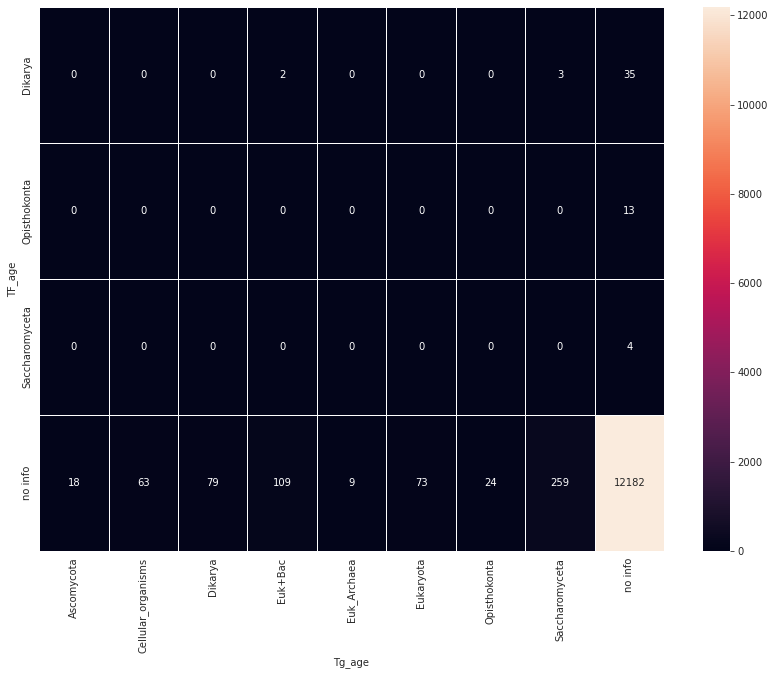

In [353]:
sns.heatmap(heatmap_y, annot=True, linewidths=0.5, fmt='g')

In [354]:
sns.heatmap(heatmap_y, annot=True, linewidths=0.5, fmt='g')
plt.savefig('../data/02_plots/yeast_heatmap_01.png')
plt.close()

In [355]:
# replace noinfo-noinfo with '0'
heatmap_y_noinfo = heatmap_y.copy()
heatmap_y_noinfo.iloc[-1,-1] = 0

<AxesSubplot:xlabel='Tg_age', ylabel='TF_age'>

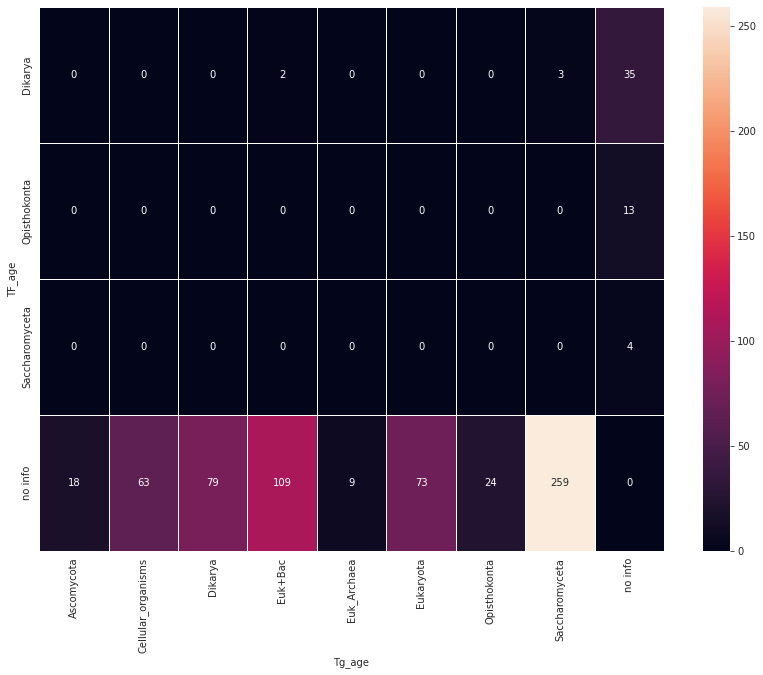

In [356]:
sns.heatmap(heatmap_y_noinfo, annot=True, linewidths=0.5, fmt='g')

In [357]:
sns.heatmap(heatmap_y_noinfo, annot=True, linewidths=0.5, fmt='g')
plt.savefig('../data/02_plots/yeast_heatmap_02.png')
plt.close()

##### установление возраста связи по самому молодому узлу

In [264]:
# установление возраста связи по самому молодому узлу
classes = ['no info', 'Cellular_organisms', 'Euk_Archaea','Euk+Bac', 'Eukaryota',
           'Opisthokonta', 'Dikarya', 'Ascomycota', 'Saccharomyceta']

yeast_data['Tg_age'] = yeast_data['Tg_age'].apply(lambda x: classes.index(x))
yeast_data['TF_age'] = yeast_data['TF_age'].apply(lambda x: classes.index(x))

ValueError: 0 is not in list

In [240]:
yeast_data['age_max'] = np.where(yeast_data['TF_age'] > yeast_data['Tg_age'], 
                                 yeast_data['TF_age'],
                                 yeast_data['Tg_age'])

In [241]:
# перевод обратно в названия классов
yeast_data['age_max'] = yeast_data['age_max'].apply(lambda x: classes[x])

In [248]:
# no info to NAN
yeast_data['age_max'] = yeast_data['age_max'].replace({'no info': np.nan})

In [249]:
# Доля классов (по молодому) с учетом всех связей
yeast_data[['age_max']].value_counts(normalize=True, dropna=False)

age_max           
NaN                   0.946322
Saccharomyceta        0.020663
Dikarya               0.009011
Euk+Bac               0.008467
Eukaryota             0.005671
Cellular_organisms    0.004894
Opisthokonta          0.002874
Ascomycota            0.001398
Euk_Archaea           0.000699
dtype: float64

In [250]:
# Доля классов среди известных классов (по молодому)
yeast_data[['age_max']].value_counts(normalize=True)

age_max           
Saccharomyceta        0.384949
Dikarya               0.167873
Euk+Bac               0.157742
Eukaryota             0.105644
Cellular_organisms    0.091172
Opisthokonta          0.053546
Ascomycota            0.026049
Euk_Archaea           0.013025
dtype: float64

In [412]:
ax = (yeast_data['age_max'].value_counts(normalize=True) * 100).plot.barh()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.title('Age (from most recent node), yeast')
plt.savefig('../data/02_plots/plot_10.png')
plt.close()

In [413]:
ax = (yeast_data['age_max'].value_counts(normalize=True, dropna=False) * 100).plot.barh()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.title('Age (from most recent node), yeast')
plt.savefig('../data/02_plots/plot_11.png')
plt.close()

##### установление возраста связи по среднему возрасту между узлами
если один из участников неизвестен - присваиваем ребру возраст известного

In [302]:
# + 0.1 use for math round

yeast_data['age_mean'] = np.where((yeast_data['TF_age'] == 0) | (yeast_data['Tg_age'] == 0),
                                  yeast_data[['TF_age', 'Tg_age']].max(axis=1),
                                  (yeast_data['TF_age'] + yeast_data['Tg_age'] + 0.1) / 2)

In [303]:
# float to int
yeast_data['age_mean'] = yeast_data['age_mean'].round().astype('int64')

In [304]:
# перевод обратно в названия классов
yeast_data['age_mean'] = yeast_data['age_mean'].apply(lambda x: classes[x])

# no info to NAN
yeast_data['age_mean'] = yeast_data['age_mean'].replace({'no info': np.nan})

In [305]:
# Доля классов (по среднему) с учетом всех связей
yeast_data[['age_mean']].value_counts(normalize=True, dropna=False)

age_mean          
NaN                   0.946322
Saccharomyceta        0.020430
Dikarya               0.008856
Euk+Bac               0.008467
Eukaryota             0.005671
Cellular_organisms    0.004894
Opisthokonta          0.003030
Ascomycota            0.001631
Euk_Archaea           0.000699
dtype: float64

In [306]:
# Доля классов среди известных классов (по молодому)
yeast_data[['age_mean']].value_counts(normalize=True)

age_mean          
Saccharomyceta        0.380608
Dikarya               0.164978
Euk+Bac               0.157742
Eukaryota             0.105644
Cellular_organisms    0.091172
Opisthokonta          0.056440
Ascomycota            0.030391
Euk_Archaea           0.013025
dtype: float64

In [414]:
ax = (yeast_data['age_mean'].value_counts(normalize=True) * 100).plot.barh()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.title('Age (from node mean), yeast')
plt.savefig('../data/02_plots/plot_12.png')
plt.close()

In [415]:
ax = (yeast_data['age_max'].value_counts(normalize=True, dropna=False) * 100).plot.barh()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.title('Age (from node mean), yeast')
plt.savefig('../data/02_plots/plot_13.png')
plt.close()

### Mouse

In [310]:
mouse_classes = pd.read_csv('../data/main_MOUSE.csv')
print(mouse_classes.shape)
mouse_classes = mouse_classes.rename(columns={"Unnamed: 0": "Protein"})
mouse_classes.head()

(19950, 16)


,Protein,Cellular_organisms,Euk_Archaea,Euk+Bac,Eukaryota,Opisthokonta,Eumetazoa,Vertebrata,Mammalia,modeAge,NumDBsContributing,NumDBsFiltered,entropy,NodeError,Bimodality,HGT_flag
0,A0A0A0MQ97,0.000000,0.000000,0.000000,0.0,0.0,0.375000,0.625000,0.000000,Vertebrata,8,5,0.661563,3.33333333333,1.599206,False
1,A0A0A0MQB3,0.333333,0.083333,0.333333,0.0,0.0,0.250000,0.000000,0.000000,Cellular_organisms,12,0,1.286057,3.24242424242,-0.166667,True
2,A0A0A0MQC1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.800000,0.200000,Vertebrata,5,1,0.500402,1.0,NaN,False
3,A0A0A0MQF7,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,Eumetazoa,2,0,-0.000000,2.0,NaN,False
4,A0A0B4J1F6,0.000000,0.000000,0.000000,0.0,0.0,0.142857,0.428571,0.428571,Mammalia,7,5,1.004242,4.16666666667,4.400000,False


In [311]:
mouse_TFTG = set(list(mouse_data.TF) + list(mouse_data.Target))

In [312]:
# for uniprot mapping - https://www.uniprot.org/uploadlists/

mouse_ID_UniProt = list(mouse_classes['Protein'])

with open('../data/age_classes/mouse_ID_UniProt.txt', 'w') as f:
    for el in mouse_ID_UniProt:
        f.write(el+' ')

 ... https://www.uniprot.org/uploadlists/ ...

In [313]:
mouse_prot_genes = pd.read_csv('../data/age_classes/mouse_UniProtMapping.txt',
                                  sep='\t',
                                  engine='python',
                                  names=['Protein', 'Gene'],
                                  header=1)
mouse_prot_genes.head()

,Protein,Gene
0,A0A0A0MQC1,Ighv3-5
1,A0A0A0MQF7,1700025G04Rik
2,A0A0B4J1F6,BC053393
3,A0A0B4J1F8,Smim10l2a
4,A0A0B4J1F9,Tchh


In [314]:
mouse_classes = mouse_classes.merge(mouse_prot_genes, how='outer', on=['Protein'])
mouse_classes.head()

,Protein,Cellular_organisms,Euk_Archaea,Euk+Bac,Eukaryota,Opisthokonta,Eumetazoa,Vertebrata,Mammalia,modeAge,NumDBsContributing,NumDBsFiltered,entropy,NodeError,Bimodality,HGT_flag,Gene
0,A0A0A0MQ97,0.000000,0.000000,0.000000,0.0,0.0,0.375000,0.625000,0.000000,Vertebrata,8,5,0.661563,3.33333333333,1.599206,False,NaN
1,A0A0A0MQB3,0.333333,0.083333,0.333333,0.0,0.0,0.250000,0.000000,0.000000,Cellular_organisms,12,0,1.286057,3.24242424242,-0.166667,True,NaN
2,A0A0A0MQC1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.800000,0.200000,Vertebrata,5,1,0.500402,1.0,NaN,False,Ighv3-5
3,A0A0A0MQF7,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,Eumetazoa,2,0,-0.000000,2.0,NaN,False,1700025G04Rik
4,A0A0B4J1F6,0.000000,0.000000,0.000000,0.0,0.0,0.142857,0.428571,0.428571,Mammalia,7,5,1.004242,4.16666666667,4.400000,False,BC053393


In [315]:
mouse_classes.shape

(20001, 17)

In [316]:
mouse_gene_ages = mouse_classes.query('Gene in @mouse_TFTG')
#mouse_gene_ages = mouse_gene_ages[['Gene', 'modeAge']]
print(mouse_gene_ages.shape)
mouse_gene_ages.head()

(2287, 17)


,Protein,Cellular_organisms,Euk_Archaea,Euk+Bac,Eukaryota,Opisthokonta,Eumetazoa,Vertebrata,Mammalia,modeAge,NumDBsContributing,NumDBsFiltered,entropy,NodeError,Bimodality,HGT_flag,Gene
44,A1L358,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.000000,Opisthokonta,1,11,-0.000000,5.98484848485,3.577778,False,Mzf1
80,A2A5Z6,0.0,0.0,0.0,0.714286,0.0,0.142857,0.142857,0.000000,Eukaryota,7,5,0.796312,4.10606060606,4.533333,False,Smurf2
87,A2A6M5,0.0,0.0,0.0,0.090909,0.0,0.272727,0.363636,0.272727,Vertebrata,11,1,1.294545,5.37878787879,2.711111,False,Calcoco2
97,A2A7F4,0.0,0.0,0.0,0.000000,0.0,0.384615,0.615385,0.000000,Vertebrata,13,0,0.666278,1.02564102564,0.150794,False,Rlf
114,A2A863,0.0,0.0,0.0,0.000000,0.0,0.583333,0.416667,0.000000,Eumetazoa,12,1,0.679193,2.48717948718,1.988095,False,Itgb4


#### Add New info to Graf:

In [317]:
mouse_attrs = mouse_gene_ages[['Gene', 'modeAge']].set_index('Gene').T.to_dict('dict')
nx.set_node_attributes(mouse_graph, mouse_attrs) 

/tmp/ipykernel_142483/1163802281.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  mouse_attrs = mouse_gene_ages[['Gene', 'modeAge']].set_index('Gene').T.to_dict('dict')


In [318]:
mouse_gene_ages.groupby('modeAge').count().Gene

modeAge
Cellular_organisms     85
Euk+Bac               153
Euk_Archaea            20
Eukaryota             436
Eumetazoa             878
Mammalia              152
Opisthokonta          130
Vertebrata            433
Name: Gene, dtype: int64

In [319]:
selected_nodes_mouse = [n for n,v in mouse_graph.nodes(data=True) if v]
selected_edges_mouse = [(u, v) for u, v, e in mouse_graph.edges(data=True) if u in selected_nodes_mouse or v in selected_nodes_mouse]

mouse_H = nx.DiGraph(((u, v, e) for u,v,e in mouse_graph.edges(data=True) if u in selected_nodes_mouse or v in selected_nodes_mouse))
nx.set_node_attributes(mouse_H, mouse_attrs)

In [320]:
color_map_m = []

color_dict_m = {'Vertebrata': 'tab:blue', 'Cellular_organisms': 'tab:green',
                'Eumetazoa': 'gold', 'Euk+Bac': 'tab:red',
                'Euk_Archaea': 'tab:pink', 'Eukaryota': 'tab:olive',
                'Opisthokonta': 'tab:cyan', 'Mammalia': 'red'}

for node in mouse_H.nodes(data=True):
    
    if node[1].get('modeAge') in color_dict.keys():
        color_map_m.append(color_dict_m[node[1].get('modeAge')])
    
    else: 
        color_map_m.append('ivory')

In [720]:
plt.figure(figsize=(50, 50))
pos = nx.bipartite_layout(mouse_H, selected_nodes_mouse)
nx.draw_networkx_nodes(mouse_H, pos, node_color=color_map_m)
nx.draw_networkx_edges(mouse_H, pos)

#plt.show()
plt.savefig('../data/02_plots/plot_04.png')
plt.close()

In [679]:
plt.figure(figsize=(50, 50))
pos = nx.circular_layout(mouse_H)

nx.draw_networkx_nodes(mouse_H, pos, node_color=color_map_m)
nx.draw_networkx_edges(mouse_H, pos)

#plt.show()
plt.savefig('../data/02_plots/plot_05.png')
plt.close()

#### Связь-возраст

In [321]:
mtf_ages_list = []
mtg_ages_list = []

for i in mouse_data.TF:
    if list(mouse_gene_ages.loc[mouse_gene_ages['Gene'] == i]['modeAge']):
        mtf_ages_list.append(mouse_gene_ages.loc[mouse_gene_ages['Gene'] == i]['modeAge'].iloc[0])
        
    else:
        mtf_ages_list.append(None)

for i in mouse_data.Target:
    if list(mouse_gene_ages.loc[mouse_gene_ages['Gene'] == i]['modeAge']):
        mtg_ages_list.append(mouse_gene_ages.loc[mouse_gene_ages['Gene'] == i]['modeAge'].iloc[0])
    else:
        mtg_ages_list.append(None)

In [322]:
mouse_data['TF_age'] = mtf_ages_list
mouse_data['Tg_age'] = mtg_ages_list

mouse_data['TF_age'].replace('None', np.nan, inplace=True)
mouse_data['Tg_age'].replace('None', np.nan, inplace=True)

In [682]:
# сохраним датафрейм
mouse_data.to_csv('../data/trrust_rawdata.mouse_classes.csv')

In [323]:
# Есть ребра, где классы не совпадают
mouse_data[mouse_data['TF_age'] != mouse_data['Tg_age']]

,TF,Target,Mode,PMID,TF_age,Tg_age
0,Aatf,Bak1,Unknown,22983126,Eukaryota,Eumetazoa
1,Aatf,Bax,Unknown,22983126,Eukaryota,Eumetazoa
2,Aatf,Bbc3,Unknown,22983126,Eukaryota,Mammalia
3,Aatf,Cdkn1a,Unknown,21317046,Eukaryota,Eumetazoa
5,Aatf,Trp53,Activation,17157788;20708154,Eukaryota,Opisthokonta
...,...,...,...,...,...,...
7048,Zic2,Afp,Repression,16765502,Eumetazoa,Vertebrata
7053,Zic3,Nanog,Activation,20872845;23421367,Eumetazoa,Mammalia
7054,Zscan10,Nanog,Activation,17628018,Opisthokonta,Mammalia
7055,Zscan10,Pou5f1,Activation,17628018,Opisthokonta,Mammalia


In [325]:
mouse_data['TF_age'].fillna('', inplace=True)
mouse_data['Tg_age'].fillna('', inplace=True)

mouse_data["age"] = mouse_data.apply(lambda row: row["TF_age"] if row["Tg_age"] == row["TF_age"] else row["TF_age"] + row["Tg_age"], axis=1) 

In [326]:
mouse_data['age'].replace('', np.nan, inplace=True)

In [327]:
mouse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7057 entries, 0 to 7056
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TF      7057 non-null   object
 1   Target  7057 non-null   object
 2   Mode    7057 non-null   object
 3   PMID    7057 non-null   object
 4   TF_age  7057 non-null   object
 5   Tg_age  7057 non-null   object
 6   age     7029 non-null   object
dtypes: object(7)
memory usage: 386.1+ KB


In [704]:
mouse_data.groupby('age', as_index=False).count()

,age,TF,Target,Mode,PMID,TF_age,Tg_age
0,Cellular_organisms,23,23,23,23,23,23
1,Cellular_organismsEuk+Bac,4,4,4,4,4,4
2,Cellular_organismsEukaryota,8,8,8,8,8,8
3,Cellular_organismsEumetazoa,26,26,26,26,26,26
4,Cellular_organismsMammalia,6,6,6,6,6,6
5,Cellular_organismsOpisthokonta,3,3,3,3,3,3
6,Cellular_organismsVertebrata,16,16,16,16,16,16
7,Euk+Bac,43,43,43,43,43,43
8,Euk+BacCellular_organisms,2,2,2,2,2,2
9,Euk+BacEukaryota,5,5,5,5,5,5


In [705]:
mouse_data[['age']].value_counts()

age                           
Eumetazoa                         1888
EumetazoaVertebrata                884
EumetazoaEukaryota                 436
Vertebrata                         391
EumetazoaMammalia                  364
VertebrataEumetazoa                334
EukaryotaEumetazoa                 266
EumetazoaEuk+Bac                   242
Eukaryota                          241
EumetazoaOpisthokonta              231
OpisthokontaEumetazoa              230
EukaryotaVertebrata                149
OpisthokontaVertebrata             134
EumetazoaCellular_organisms        130
VertebrataEukaryota                120
Opisthokonta                        99
OpisthokontaEukaryota               86
VertebrataMammalia                  72
VertebrataEuk+Bac                   63
EukaryotaMammalia                   56
Mammalia                            55
EukaryotaOpisthokonta               54
OpisthokontaMammalia                52
Euk+Bac                             43
EukaryotaEuk+Bac                 

In [706]:
# Доля классов с учетом всех связей
mouse_data[['age']].value_counts(normalize=True, dropna=False)

age                           
Eumetazoa                         0.267536
EumetazoaVertebrata               0.125266
EumetazoaEukaryota                0.061783
Vertebrata                        0.055406
EumetazoaMammalia                 0.051580
VertebrataEumetazoa               0.047329
EukaryotaEumetazoa                0.037693
EumetazoaEuk+Bac                  0.034292
Eukaryota                         0.034150
EumetazoaOpisthokonta             0.032733
OpisthokontaEumetazoa             0.032592
EukaryotaVertebrata               0.021114
OpisthokontaVertebrata            0.018988
EumetazoaCellular_organisms       0.018421
VertebrataEukaryota               0.017004
Opisthokonta                      0.014029
OpisthokontaEukaryota             0.012186
VertebrataMammalia                0.010203
VertebrataEuk+Bac                 0.008927
EukaryotaMammalia                 0.007935
Mammalia                          0.007794
EukaryotaOpisthokonta             0.007652
OpisthokontaMammalia   

In [707]:
# Доля классов среди исзвестных классов
mouse_data[['age']].value_counts(normalize=True)

age                           
Eumetazoa                         0.268602
EumetazoaVertebrata               0.125765
EumetazoaEukaryota                0.062029
Vertebrata                        0.055627
EumetazoaMammalia                 0.051785
VertebrataEumetazoa               0.047517
EukaryotaEumetazoa                0.037843
EumetazoaEuk+Bac                  0.034429
Eukaryota                         0.034287
EumetazoaOpisthokonta             0.032864
OpisthokontaEumetazoa             0.032722
EukaryotaVertebrata               0.021198
OpisthokontaVertebrata            0.019064
EumetazoaCellular_organisms       0.018495
VertebrataEukaryota               0.017072
Opisthokonta                      0.014085
OpisthokontaEukaryota             0.012235
VertebrataMammalia                0.010243
VertebrataEuk+Bac                 0.008963
EukaryotaMammalia                 0.007967
Mammalia                          0.007825
EukaryotaOpisthokonta             0.007682
OpisthokontaMammalia   

In [416]:
plt.figure(figsize=(15, 15))
ax = (mouse_data[['age']].value_counts(normalize=True) * 100).plot.barh()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.savefig('../data/02_plots/plot_06.png')
plt.close()

####  heatmap

In [373]:
# heatmap

# Substituting nans with "no info"
mouse_data[['Tg_age', 'TF_age']] = mouse_data[['Tg_age', 'TF_age']].replace('', 'no info')

In [375]:
heatmap_m = pd.crosstab(mouse_data.TF_age, mouse_data.Tg_age)
heatmap_m

Tg_age,Cellular_organisms,Euk+Bac,Euk_Archaea,Eukaryota,Eumetazoa,Mammalia,Opisthokonta,Vertebrata,no info
TF_age,,,,,,,,,
Cellular_organisms,3,4,0,8,26,6,3,16,3
Euk+Bac,2,0,0,5,14,2,4,12,2
Euk_Archaea,0,1,1,3,2,2,0,3,0
Eukaryota,21,42,7,112,266,56,54,149,34
Eumetazoa,130,242,13,436,1445,364,231,884,238
Mammalia,0,3,0,7,42,10,8,17,11
Opisthokonta,20,29,5,86,230,52,39,134,31
Vertebrata,16,63,3,120,334,72,38,224,62
no info,17,41,1,95,205,34,29,105,28


<AxesSubplot:xlabel='Tg_age', ylabel='TF_age'>

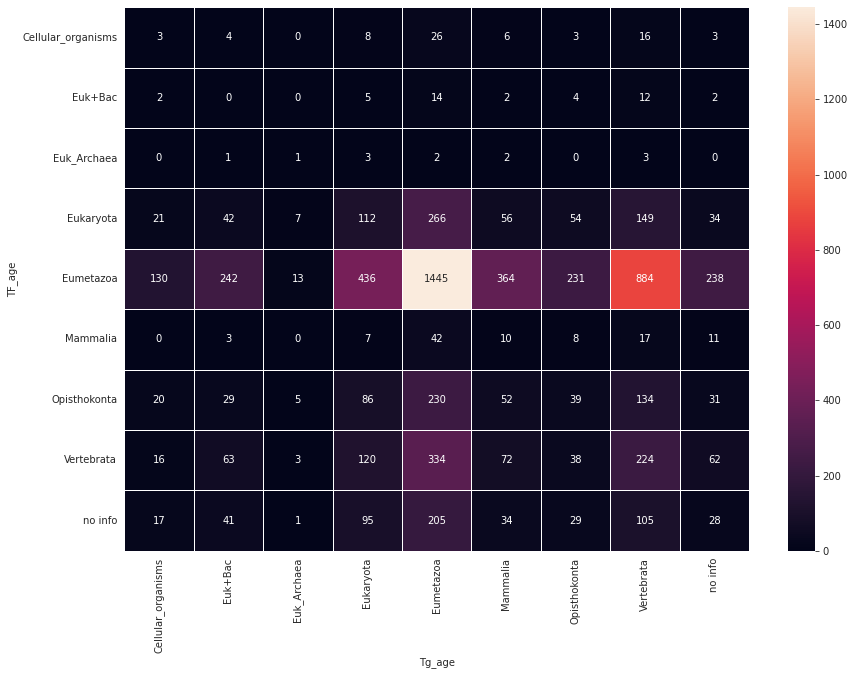

In [376]:
sns.heatmap(heatmap_m, annot=True, linewidths=0.5, fmt='g')

In [377]:
sns.heatmap(heatmap_m, annot=True, linewidths=0.5, fmt='g')
plt.savefig('../data/02_plots/mouse_heatmap_01.png')
plt.close()

In [378]:
# replace noinfo-noinfo with '0'
heatmap_m_noinfo = heatmap_m.copy()
heatmap_m_noinfo.iloc[-1,-1] = 0

<AxesSubplot:xlabel='Tg_age', ylabel='TF_age'>

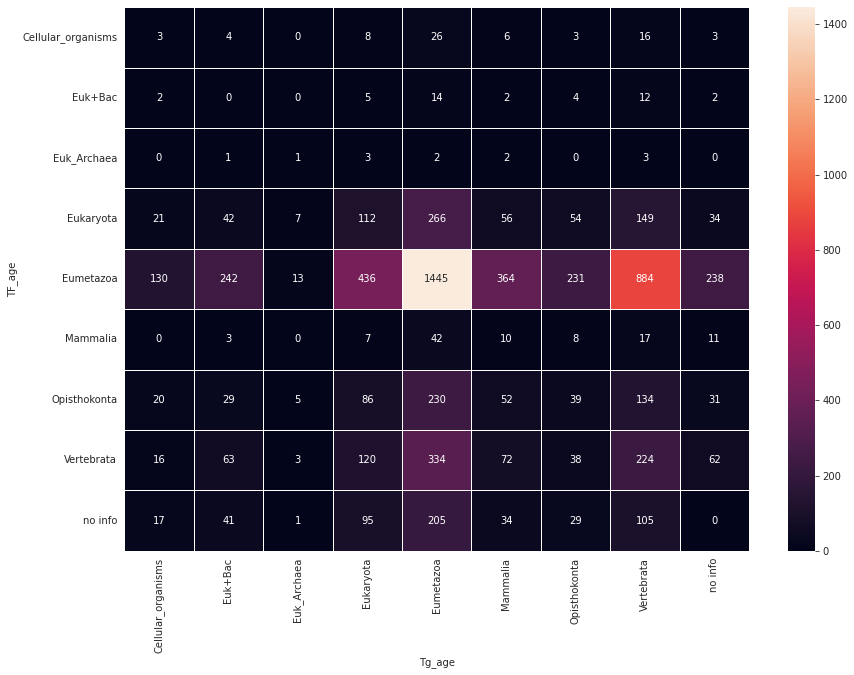

In [379]:
sns.heatmap(heatmap_m_noinfo, annot=True, linewidths=0.5, fmt='g')

In [364]:
sns.heatmap(heatmap_m_noinfo, annot=True, linewidths=0.5, fmt='g')
plt.savefig('../data/02_plots/mouse_heatmap_02.png')
plt.close()

#### установка возраста по наиболее молодому узлу

In [381]:
# установление возраста связи по самому молодому узлу
classes = ['no info', 'Cellular_organisms', 'Euk_Archaea','Euk+Bac', 'Eukaryota',
           'Opisthokonta', 'Eumetazoa', 'Vertebrata', 'Mammalia']

mouse_data['Tg_age'] = mouse_data['Tg_age'].apply(lambda x: classes.index(x))
mouse_data['TF_age'] = mouse_data['TF_age'].apply(lambda x: classes.index(x))

In [382]:
mouse_data['age_max'] = np.where(mouse_data['TF_age'] > mouse_data['Tg_age'], 
                                 mouse_data['TF_age'],
                                 mouse_data['Tg_age'])

In [383]:
# перевод обратно в названия классов
mouse_data['age_max'] = mouse_data['age_max'].apply(lambda x: classes[x])

In [384]:
# no info to NAN
mouse_data['age_max'] = mouse_data['age_max'].replace({'no info': np.nan})

In [385]:
# Доля классов (по молодому) с учетом всех связей
mouse_data[['age_max']].value_counts(normalize=True, dropna=False)

age_max           
Eumetazoa            0.49
Vertebrata           0.31
Mammalia             0.10
Eukaryota            0.05
Opisthokonta         0.04
Euk+Bac              0.01
NaN                  0.00
Cellular_organisms   0.00
Euk_Archaea          0.00
dtype: float64

In [386]:
# Доля классов среди известных классов (по молодому)
mouse_data[['age_max']].value_counts(normalize=True)

age_max           
Eumetazoa            0.49
Vertebrata           0.31
Mammalia             0.10
Eukaryota            0.05
Opisthokonta         0.04
Euk+Bac              0.01
Cellular_organisms   0.00
Euk_Archaea          0.00
dtype: float64

In [417]:
ax = (mouse_data['age_max'].value_counts(normalize=True) * 100).plot.barh()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.title('Age (from most recent node), mouse')
plt.savefig('../data/02_plots/plot_14.png')
plt.close()

In [418]:
ax = (mouse_data['age_max'].value_counts(normalize=True, dropna=False) * 100).plot.barh()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.title('Age (from most recent node), mouse')
plt.savefig('../data/02_plots/plot_15.png')
plt.close()

##### установление возраста связи по среднему возрасту между узлами
если один из участников неизвестен - присваиваем ребру возраст известного

In [419]:
# + 0.1 use for math round

mouse_data['age_mean'] = np.where((mouse_data['TF_age'] == 0) | (mouse_data['Tg_age'] == 0),
                                  mouse_data[['TF_age', 'Tg_age']].max(axis=1),
                                  (mouse_data['TF_age'] + mouse_data['Tg_age'] + 0.1) / 2)

In [421]:
# float to int
mouse_data['age_mean'] = mouse_data['age_mean'].round().astype('int64')

In [422]:
# перевод обратно в названия классов
mouse_data['age_mean'] = mouse_data['age_mean'].apply(lambda x: classes[x])

# no info to NAN
mouse_data['age_mean'] = mouse_data['age_mean'].replace({'no info': np.nan})

In [423]:
# Доля классов (по среднему) с учетом всех связей
mouse_data[['age_mean']].value_counts(normalize=True, dropna=False)

age_mean          
Eumetazoa            0.40
Vertebrata           0.29
Opisthokonta         0.18
Eukaryota            0.07
Mammalia             0.02
Euk+Bac              0.02
NaN                  0.00
Cellular_organisms   0.00
Euk_Archaea          0.00
dtype: float64

In [424]:
# Доля классов среди известных классов (по молодому)
mouse_data[['age_mean']].value_counts(normalize=True)

age_mean          
Eumetazoa            0.41
Vertebrata           0.30
Opisthokonta         0.18
Eukaryota            0.08
Mammalia             0.02
Euk+Bac              0.02
Cellular_organisms   0.00
Euk_Archaea          0.00
dtype: float64

In [427]:
ax = (mouse_data['age_mean'].value_counts(normalize=True) * 100).plot.barh()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.title('Age (from node mean), mouse')
plt.savefig('../data/02_plots/plot_16.png')
plt.close()

In [428]:
ax = (mouse_data['age_max'].value_counts(normalize=True, dropna=False) * 100).plot.barh()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.title('Age (from node mean), mouse')
plt.savefig('../data/02_plots/plot_17.png')
plt.close()

### Human

In [429]:
human_classes = pd.read_csv('../data/main_HUMAN.csv')
print(human_classes.shape)
human_classes = human_classes.rename(columns={"Unnamed: 0": "Protein"})
human_classes.head()

(20331, 16)


,Protein,Cellular_organisms,Euk_Archaea,Euk+Bac,Eukaryota,Opisthokonta,Eumetazoa,Vertebrata,Mammalia,modeAge,NumDBsContributing,NumDBsFiltered,entropy,NodeError,Bimodality,HGT_flag
0,A0A075B6G5,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,Eumetazoa,1,1,-0.00,6.0,NaN,False
1,A0A075B6R3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,Mammalia,2,1,-0.00,10.6666666667,16.00,False
2,A0A0A0MR89,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,Eumetazoa,1,1,-0.00,1.0,NaN,False
3,A0A0A0MS98,0.00,0.00,0.00,0.00,0.00,0.45,0.00,0.55,Mammalia,11,1,0.69,5.68181818182,1.80,False
4,A0A0A0MSJ3,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,Eukaryota,2,0,-0.00,1.0,NaN,False


In [430]:
human_TFTG = set(list(human_data.TF) + list(human_data.Target))

In [431]:
# for uniprot mapping - https://www.uniprot.org/uploadlists/

human_ID_UniProt = list(human_classes['Protein'])

with open('../data/age_classes/human_ID_UniProt.txt', 'w') as f:
    for el in human_ID_UniProt:
        f.write(el+' ')

 ... https://www.uniprot.org/uploadlists/ ...

In [432]:
human_prot_genes = pd.read_csv('../data/age_classes/human_UniProtMapping.txt',
                                  sep='\t',
                                  engine='python',
                                  names=['Protein', 'Gene'],
                                  header=1)
print(human_prot_genes.shape)
human_prot_genes.head()

(19629, 2)


,Protein,Gene
0,A0A075B6R3,HELZ
1,A0A0A0MR89,NRXN3
2,A0A0A0MS98,SLC4A1
3,A0A0A0MSL8,RBM14-RBM4
4,A0A0A0MTC1,RNF213


In [433]:
human_classes = human_classes.merge(human_prot_genes, how='outer', on=['Protein'])
human_classes.head()

,Protein,Cellular_organisms,Euk_Archaea,Euk+Bac,Eukaryota,Opisthokonta,Eumetazoa,Vertebrata,Mammalia,modeAge,NumDBsContributing,NumDBsFiltered,entropy,NodeError,Bimodality,HGT_flag,Gene
0,A0A075B6G5,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,Eumetazoa,1,1,-0.00,6.0,NaN,False,NaN
1,A0A075B6R3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,Mammalia,2,1,-0.00,10.6666666667,16.00,False,HELZ
2,A0A0A0MR89,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,Eumetazoa,1,1,-0.00,1.0,NaN,False,NRXN3
3,A0A0A0MS98,0.00,0.00,0.00,0.00,0.00,0.45,0.00,0.55,Mammalia,11,1,0.69,5.68181818182,1.80,False,SLC4A1
4,A0A0A0MSJ3,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,Eukaryota,2,0,-0.00,1.0,NaN,False,NaN


In [434]:
human_classes.shape

(20479, 17)

In [435]:
human_gene_ages = human_classes.query('Gene in @human_TFTG')
#human_gene_ages = human_gene_ages[['Gene', 'modeAge']]
print(human_gene_ages.shape)
human_gene_ages

(2855, 17)


,Protein,Cellular_organisms,Euk_Archaea,Euk+Bac,Eukaryota,Opisthokonta,Eumetazoa,Vertebrata,Mammalia,modeAge,NumDBsContributing,NumDBsFiltered,entropy,NodeError,Bimodality,HGT_flag,Gene
23,A0AVK6,0.00,0.00,0.00,0.70,0.00,0.00,0.30,0.00,Eukaryota,10,3,0.61,4.51282051282,2.86,False,E2F8
94,A2AB90,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,Vertebrata,6,1,-0.00,1.14285714286,4.00,False,TAPBP
96,A2ADX3,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,Vertebrata,4,1,-0.00,0.0,NaN,False,HLA-DQB2
196,A6H8Y1,0.00,0.00,0.00,0.67,0.00,0.33,0.00,0.00,Eukaryota,9,4,0.64,6.35897435897,0.36,False,BDP1
501,A6NNB3,0.00,0.00,0.00,0.00,0.00,0.08,0.92,0.00,Vertebrata,12,1,0.29,0.74358974359,0.09,False,IFITM5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20459,Q9Y6W6,0.00,0.00,0.14,0.71,0.00,0.14,0.00,0.00,Eukaryota,7,6,0.80,3.58974358974,0.99,False,DUSP10
20461,Q9Y6X0,0.00,0.00,0.00,0.17,0.00,0.00,0.83,0.00,Vertebrata,12,1,0.45,3.23076923077,0.74,False,SETBP1
20463,Q9Y6X2,0.00,0.00,0.00,0.58,0.08,0.00,0.33,0.00,Eukaryota,12,1,0.89,4.64102564103,3.51,False,PIAS3
20468,Q9Y6X8,0.00,0.00,0.00,0.00,0.00,0.64,0.36,0.00,Eumetazoa,11,2,0.66,1.07692307692,2.00,False,ZHX2


#### Add New info to Graf:

In [436]:
human_attrs = human_gene_ages[['Gene', 'modeAge']].set_index('Gene').T.to_dict('dict')
nx.set_node_attributes(human_graph, human_attrs) 

/tmp/ipykernel_142483/3792171582.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  human_attrs = human_gene_ages[['Gene', 'modeAge']].set_index('Gene').T.to_dict('dict')


In [437]:
human_gene_ages.groupby('modeAge').count().Gene

modeAge
Cellular_organisms    145
Euk+Bac               230
Euk_Archaea            27
Eukaryota             650
Eumetazoa             891
Mammalia              212
Opisthokonta          167
Vertebrata            533
Name: Gene, dtype: int64

In [438]:
selected_nodes_human = [n for n,v in human_graph.nodes(data=True) if v]
selected_edges_human = [(u, v) for u, v, e in human_graph.edges(data=True) if u in selected_nodes_human or v in selected_nodes_human]

human_H = nx.DiGraph(((u, v, e) for u,v,e in human_graph.edges(data=True) if u in selected_nodes_human or v in selected_nodes_human))
nx.set_node_attributes(human_H, human_attrs)


In [439]:
color_map_h = []

color_dict_h = {'Vertebrata': 'tab:blue', 'Cellular_organisms': 'tab:green',
                'Eumetazoa': 'gold', 'Euk+Bac': 'tab:red',
                'Euk_Archaea': 'tab:pink', 'Eukaryota': 'tab:olive',
                'Opisthokonta': 'tab:cyan', 'Mammalia': 'red'}

for node in human_H.nodes(data=True):
    
    if node[1].get('modeAge') in color_dict.keys():
        color_map_h.append(color_dict_h[node[1].get('modeAge')])
    
    else: 
        color_map_h.append('ivory')

In [440]:
plt.figure(figsize=(50, 50))
pos = nx.bipartite_layout(human_H, selected_nodes_human)
nx.draw_networkx_nodes(human_H, pos, node_color=color_map_h)
nx.draw_networkx_edges(human_H, pos)

#plt.show()
plt.savefig('../data/02_plots/plot_07.png')
plt.close()

In [728]:
plt.figure(figsize=(50, 50))
pos = nx.circular_layout(human_H)

nx.draw_networkx_nodes(human_H, pos, node_color=color_map_h)
nx.draw_networkx_edges(human_H, pos)

#plt.show()
plt.savefig('../data/02_plots/plot_08.png')
plt.close()

Связь-возраст

In [441]:
htf_ages_list = []
htg_ages_list = []

for i in human_data.TF:
    if list(human_gene_ages.loc[human_gene_ages['Gene'] == i]['modeAge']):
        htf_ages_list.append(human_gene_ages.loc[human_gene_ages['Gene'] == i]['modeAge'].iloc[0])
        
    else:
        htf_ages_list.append(None)

for i in human_data.Target:
    if list(human_gene_ages.loc[human_gene_ages['Gene'] == i]['modeAge']):
        htg_ages_list.append(human_gene_ages.loc[human_gene_ages['Gene'] == i]['modeAge'].iloc[0])
    else:
        htg_ages_list.append(None)

In [442]:
human_data['TF_age'] = htf_ages_list
human_data['Tg_age'] = htg_ages_list

human_data['TF_age'].replace('None', np.nan, inplace=True)
human_data['Tg_age'].replace('None', np.nan, inplace=True)


In [731]:
# сохраним датафрейм
human_data.to_csv('../data/trrust_rawdata.human_classes.csv')

In [443]:
# Есть ребра, где классы не совпадают
human_data[human_data['TF_age'] != human_data['Tg_age']]

,TF,Target,Mode,PMID,TF_age,Tg_age
0,AATF,BAX,Repression,22909821,Eukaryota,Eumetazoa
1,AATF,CDKN1A,Unknown,17157788,Eukaryota,Eumetazoa
2,AATF,KLK3,Unknown,23146908,Eukaryota,Mammalia
3,AATF,MYC,Activation,20549547,Eukaryota,Eumetazoa
4,AATF,TP53,Unknown,17157788,Eukaryota,Opisthokonta
...,...,...,...,...,...,...
9390,ZNF444,SCARF1,Activation,11978792,Mammalia,Vertebrata
9391,ZNF76,CDKN1A,Repression,15280358,Eukaryota,Eumetazoa
9393,ZNF76,TALDO1,Unknown,14702349,Eukaryota,Cellular_organisms
9394,ZNRD1,ABCB1,Activation,16373708,None,Euk+Bac


In [444]:
human_data['TF_age'].fillna('', inplace=True)
human_data['Tg_age'].fillna('', inplace=True)

human_data["age"] = human_data.apply(lambda row: row["TF_age"] if row["Tg_age"] == row["TF_age"] else row["TF_age"] + row["Tg_age"], axis=1) 

In [445]:
human_data['age'].replace('', np.nan, inplace=True)
human_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9396 entries, 0 to 9395
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TF      9396 non-null   object
 1   Target  9396 non-null   object
 2   Mode    9396 non-null   object
 3   PMID    9396 non-null   object
 4   TF_age  9396 non-null   object
 5   Tg_age  9396 non-null   object
 6   age     9395 non-null   object
dtypes: object(7)
memory usage: 514.0+ KB


In [446]:
human_data.groupby('age', as_index=False).count()

,age,TF,Target,Mode,PMID,TF_age,Tg_age
0,Cellular_organisms,19,19,19,19,19,19
1,Cellular_organismsEuk+Bac,18,18,18,18,18,18
2,Cellular_organismsEuk_Archaea,4,4,4,4,4,4
3,Cellular_organismsEukaryota,34,34,34,34,34,34
4,Cellular_organismsEumetazoa,81,81,81,81,81,81
5,Cellular_organismsMammalia,19,19,19,19,19,19
6,Cellular_organismsOpisthokonta,36,36,36,36,36,36
7,Cellular_organismsVertebrata,50,50,50,50,50,50
8,Euk+Bac,3,3,3,3,3,3
9,Euk+BacCellular_organisms,2,2,2,2,2,2


In [447]:
human_data[['age']].value_counts()

age                           
Eumetazoa                         1539
EumetazoaVertebrata               1010
EumetazoaEukaryota                 741
OpisthokontaEumetazoa              540
VertebrataEumetazoa                437
Vertebrata                         410
OpisthokontaVertebrata             385
EukaryotaEumetazoa                 355
EumetazoaEuk+Bac                   340
EumetazoaMammalia                  323
OpisthokontaEukaryota              309
EumetazoaOpisthokonta              271
Eukaryota                          261
VertebrataEukaryota                259
EumetazoaCellular_organisms        240
EukaryotaVertebrata                193
OpisthokontaEuk+Bac                171
Opisthokonta                       161
VertebrataMammalia                 146
OpisthokontaMammalia               138
EukaryotaOpisthokonta              103
OpisthokontaCellular_organisms     101
VertebrataOpisthokonta             101
VertebrataEuk+Bac                   98
Cellular_organismsEumetazoa      

In [448]:
# Доля классов с учетом всех связей
human_data[['age']].value_counts(normalize=True, dropna=False)

age                           
Eumetazoa                        0.16
EumetazoaVertebrata              0.11
EumetazoaEukaryota               0.08
OpisthokontaEumetazoa            0.06
VertebrataEumetazoa              0.05
Vertebrata                       0.04
OpisthokontaVertebrata           0.04
EukaryotaEumetazoa               0.04
EumetazoaEuk+Bac                 0.04
EumetazoaMammalia                0.03
OpisthokontaEukaryota            0.03
EumetazoaOpisthokonta            0.03
Eukaryota                        0.03
VertebrataEukaryota              0.03
EumetazoaCellular_organisms      0.03
EukaryotaVertebrata              0.02
OpisthokontaEuk+Bac              0.02
Opisthokonta                     0.02
VertebrataMammalia               0.02
OpisthokontaMammalia             0.01
EukaryotaOpisthokonta            0.01
VertebrataOpisthokonta           0.01
OpisthokontaCellular_organisms   0.01
VertebrataEuk+Bac                0.01
Cellular_organismsEumetazoa      0.01
EukaryotaEuk+Bac   

In [449]:
# Доля классов среди исзвестных классов
human_data[['age']].value_counts(normalize=True)

age                           
Eumetazoa                        0.16
EumetazoaVertebrata              0.11
EumetazoaEukaryota               0.08
OpisthokontaEumetazoa            0.06
VertebrataEumetazoa              0.05
Vertebrata                       0.04
OpisthokontaVertebrata           0.04
EukaryotaEumetazoa               0.04
EumetazoaEuk+Bac                 0.04
EumetazoaMammalia                0.03
OpisthokontaEukaryota            0.03
EumetazoaOpisthokonta            0.03
Eukaryota                        0.03
VertebrataEukaryota              0.03
EumetazoaCellular_organisms      0.03
EukaryotaVertebrata              0.02
OpisthokontaEuk+Bac              0.02
Opisthokonta                     0.02
VertebrataMammalia               0.02
OpisthokontaMammalia             0.01
EukaryotaOpisthokonta            0.01
OpisthokontaCellular_organisms   0.01
VertebrataOpisthokonta           0.01
VertebrataEuk+Bac                0.01
Cellular_organismsEumetazoa      0.01
EukaryotaEuk+Bac   

In [739]:
plt.figure(figsize=(15, 15))
ax = (human_data[['age']].value_counts(normalize=True) * 100).plot.barh()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.savefig('../data/02_plots/plot_09.png')
plt.close()

###  heatmap

In [450]:
# heatmap

# Substituting nans with "no info"
human_data[['Tg_age', 'TF_age']] = human_data[['Tg_age', 'TF_age']].replace('', 'no info')

In [451]:
heatmap_h = pd.crosstab(human_data.TF_age, human_data.Tg_age)
heatmap_h

Tg_age,Cellular_organisms,Euk+Bac,Euk_Archaea,Eukaryota,Eumetazoa,Mammalia,Opisthokonta,Vertebrata,no info
TF_age,,,,,,,,,
Cellular_organisms,18,18,4,34,81,19,36,50,1
Euk+Bac,2,1,0,4,11,3,3,3,0
Euk_Archaea,0,0,0,6,4,1,3,6,0
Eukaryota,46,71,29,237,355,64,103,193,9
Eumetazoa,240,340,22,741,1476,323,271,1010,49
Mammalia,3,5,0,14,60,12,10,35,2
Opisthokonta,101,171,8,309,540,138,135,385,20
Vertebrata,59,98,11,259,437,146,101,375,22
no info,0,2,0,15,14,2,6,13,1


<AxesSubplot:xlabel='Tg_age', ylabel='TF_age'>

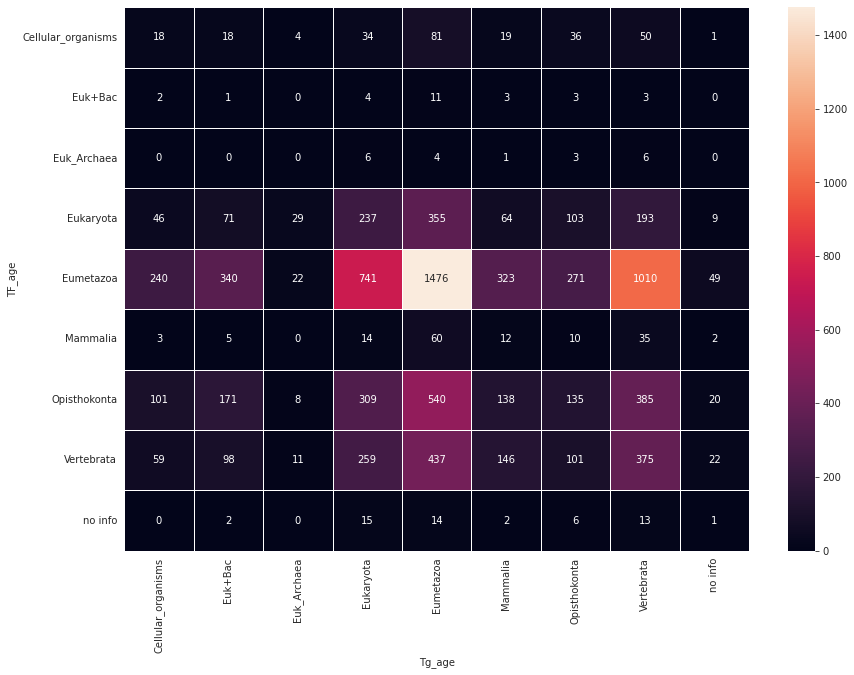

In [452]:
sns.heatmap(heatmap_h, annot=True, linewidths=0.5, fmt='g')

In [453]:
sns.heatmap(heatmap_h, annot=True, linewidths=0.5, fmt='g')
plt.savefig('../data/02_plots/human_heatmap_01.png')
plt.close()

### установка возраста по наиболее молодому узлу

In [457]:
# установление возраста связи по самому молодому узлу
classes = ['no info', 'Cellular_organisms', 'Euk_Archaea','Euk+Bac', 'Eukaryota',
           'Opisthokonta', 'Eumetazoa', 'Vertebrata', 'Mammalia']

human_data['Tg_age'] = human_data['Tg_age'].apply(lambda x: classes.index(x))
human_data['TF_age'] = human_data['TF_age'].apply(lambda x: classes.index(x))

In [458]:
human_data['age_max'] = np.where(human_data['TF_age'] > human_data['Tg_age'], 
                                 human_data['TF_age'],
                                 human_data['Tg_age'])

In [459]:
# перевод обратно в названия классов
human_data['age_max'] = human_data['age_max'].apply(lambda x: classes[x])

In [460]:
# no info to NAN
human_data['age_max'] = human_data['age_max'].replace({'no info': np.nan})

In [461]:
# Доля классов (по молодому) с учетом всех связей
human_data[['age_max']].value_counts(normalize=True, dropna=False)

age_max           
Eumetazoa            0.44
Vertebrata           0.32
Opisthokonta         0.10
Mammalia             0.09
Eukaryota            0.05
Euk+Bac              0.00
Cellular_organisms   0.00
Euk_Archaea          0.00
NaN                  0.00
dtype: float64

In [462]:
# Доля классов среди известных классов (по молодому)
human_data[['age_max']].value_counts(normalize=True)

age_max           
Eumetazoa            0.44
Vertebrata           0.32
Opisthokonta         0.10
Mammalia             0.09
Eukaryota            0.05
Euk+Bac              0.00
Cellular_organisms   0.00
Euk_Archaea          0.00
dtype: float64

Text(0.5, 1.0, 'Age (from most recent node), human')

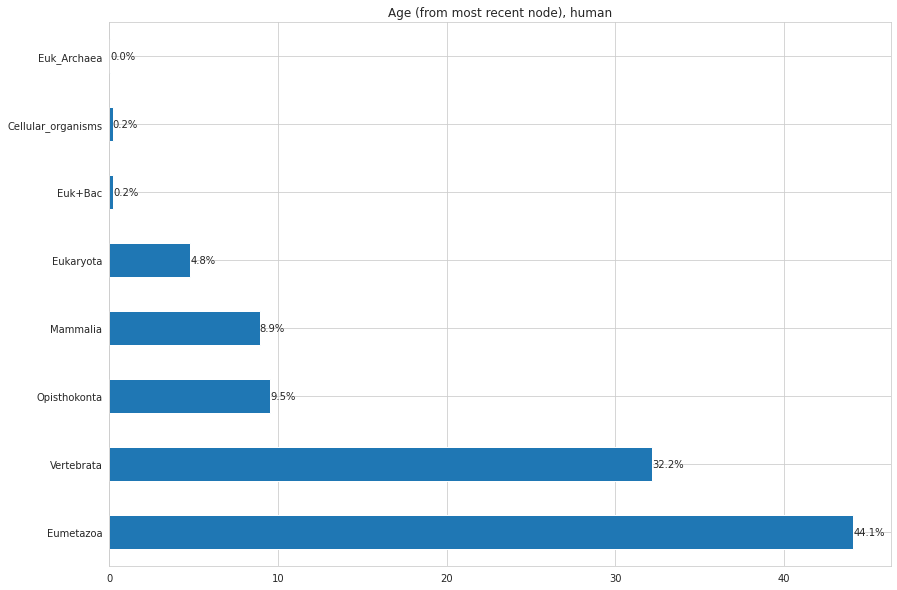

In [463]:
ax = (human_data['age_max'].value_counts(normalize=True) * 100).plot.barh()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.title('Age (from most recent node), human')
#plt.savefig('../data/02_plots/plot_18.png')
#plt.close()

In [464]:
ax = (human_data['age_max'].value_counts(normalize=True, dropna=False) * 100).plot.barh()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.title('Age (from most recent node), human')
plt.savefig('../data/02_plots/plot_19.png')
plt.close()

### установление возраста связи по среднему возрасту между узлами
если один из участников неизвестен - присваиваем ребру возраст известного

In [465]:
# + 0.1 use for math round

human_data['age_mean'] = np.where((human_data['TF_age'] == 0) | (human_data['Tg_age'] == 0),
                                  human_data[['TF_age', 'Tg_age']].max(axis=1),
                                  (human_data['TF_age'] + human_data['Tg_age'] + 0.1) / 2)

In [466]:
# float to int
human_data['age_mean'] = human_data['age_mean'].round().astype('int64')

In [467]:
# перевод обратно в названия классов
human_data['age_mean'] = human_data['age_mean'].apply(lambda x: classes[x])

# no info to NAN
human_data['age_mean'] = human_data['age_mean'].replace({'no info': np.nan})

In [468]:
# Доля классов (по среднему) с учетом всех связей
human_data[['age_mean']].value_counts(normalize=True, dropna=False)

age_mean          
Eumetazoa            0.36
Vertebrata           0.25
Opisthokonta         0.23
Eukaryota            0.10
Euk+Bac              0.03
Mammalia             0.02
Euk_Archaea          0.00
Cellular_organisms   0.00
NaN                  0.00
dtype: float64

In [469]:
# Доля классов среди известных классов (по молодому)
human_data[['age_mean']].value_counts(normalize=True)

age_mean          
Eumetazoa            0.36
Vertebrata           0.25
Opisthokonta         0.23
Eukaryota            0.10
Euk+Bac              0.03
Mammalia             0.02
Euk_Archaea          0.00
Cellular_organisms   0.00
dtype: float64

In [470]:
ax = (human_data['age_mean'].value_counts(normalize=True) * 100).plot.barh()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.title('Age (from node mean), human')
plt.savefig('../data/02_plots/plot_20.png')
plt.close()

In [471]:
ax = (human_data['age_max'].value_counts(normalize=True, dropna=False) * 100).plot.barh()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.title('Age (from node mean), human')
plt.savefig('../data/02_plots/plot_21.png')
plt.close()

## Более продвинутые идеи (например посмотреть коррелирует ли node degree с age class) уже тоже можно пробовать.